<a href="https://colab.research.google.com/github/yashraj01-se/Pytorchrepo/blob/main/Excercise_4_Clasification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from timeit import default_timer as timer
from tqdm.auto import tqdm
from pathlib import Path

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
train_data=torchvision.datasets.MNIST(root="data",
                                      train=True,
                                      transform=torchvision.transforms.ToTensor(),
                                      target_transform=None,
                                      download=True)
test_data=torchvision.datasets.MNIST(root="data",
                                     train=False,
                                     transform=torchvision.transforms.ToTensor(),
                                     target_transform=None,
                                     download=True)

In [ ]:
image,label=train_data[0]
image,label

In [6]:
class_=train_data.classes
class_ = [label.split(' - ')[1] for label in train_data.classes]
class_

['zero',
 'one',
 'two',
 'three',
 'four',
 'five',
 'six',
 'seven',
 'eight',
 'nine']

In [7]:
index=train_data.class_to_idx
index= {key.split(' - ')[1]: value for key, value in train_data.class_to_idx.items()}
index

{'zero': 0,
 'one': 1,
 'two': 2,
 'three': 3,
 'four': 4,
 'five': 5,
 'six': 6,
 'seven': 7,
 'eight': 8,
 'nine': 9}

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

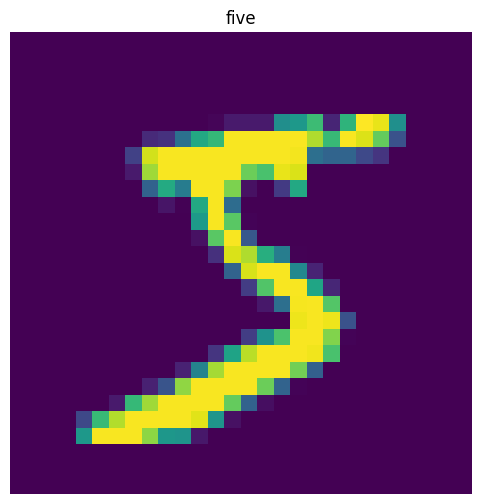

In [8]:
image,label=train_data[0]
plt.figure(figsize=(10,6))
plt.title(class_[label])
plt.imshow(image.squeeze())
plt.axis("off")

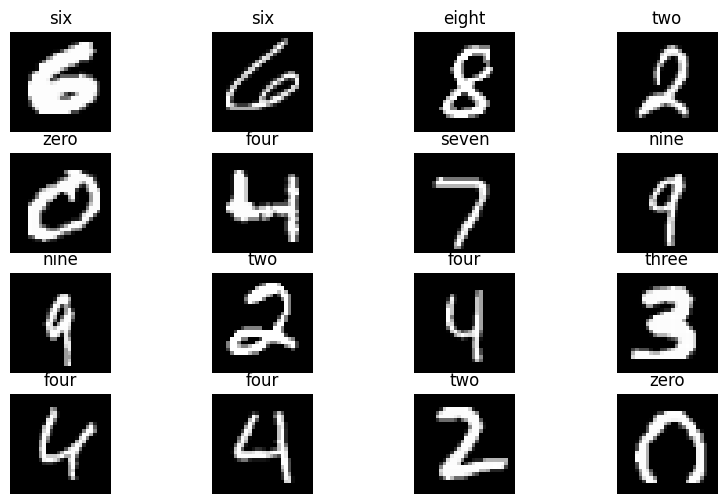

In [9]:
torch.manual_seed(42)
fig=plt.figure(figsize=(10,6))
row,col=4,4
for i in range(1,row*col+1):
  ran_idx=torch.randint(0,len(train_data),size=[1]).item()
  image,label=train_data[ran_idx]
  fig.add_subplot(row,col,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(class_[label])
  plt.axis("off")

In [10]:
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=32,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=32,
                           shuffle=True)

print("Lenght of Training DataLoader: ",len(train_dataloader))
print("Lenght of Testing DataLoader: ",len(test_dataloader))

Lenght of Training DataLoader:  1875
Lenght of Testing DataLoader:  313


In [11]:
data_feature_sample,data_lable_sample=next(iter(train_dataloader))
data_feature_sample.shape,data_feature_sample.dtype

(torch.Size([32, 1, 28, 28]), torch.float32)

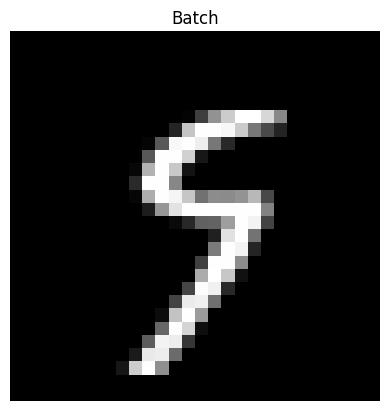

In [12]:
#show a sample Dataloader
torch.manual_seed(42)
random_index=torch.randint(0,len(data_feature_sample),size=[1]).item()
image,label=data_feature_sample[random_index] , data_lable_sample[random_index]
plt.imshow(image.squeeze(),cmap="gray")
plt.title("Batch")
plt.axis("off")
plt.show()

In [13]:
import requests
from pathlib import Path
if Path("helper_function.py").is_file():
  print("Already there")
else:
  print("Downloading")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

Already there


In [14]:
class Model_classifier_CNN(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_layer:int,
               output_shape:int):
    super().__init__()
    self.convblock1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layer,
                  out_channels=hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.convblock2=nn.Sequential(
         nn.Conv2d(in_channels=hidden_layer,
                  out_channels=hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layer,
                  out_channels=hidden_layer,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_layer*7*7,
                  out_features=len(class_))
    )

  def forward(self,x):
    x=self.convblock1(x)
    # print(x.shape)
    x=self.convblock2(x)
    # print(x.shape)
    x=self.classifier(x)
    # print(x.shape)
    return x

model=Model_classifier_CNN(input_shape=1,
                       hidden_layer=30,
                       output_shape=1).to(device)
model

Model_classifier_CNN(
  (convblock1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

**###Trick to find out Input shape:**

In [15]:
image.shape

torch.Size([1, 28, 28])

In [16]:
# random_image=torch.randn(1,28,28).unsqueeze(0)
# model(random_image)

#Making Loss_Function, Optimizer , Model:

In [17]:
from helper_function import accuracy_fn
Loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.155)

In [18]:
def train_step(model_imp:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device:torch.device,
               accuracy_fn=None):
  model.train()
  train_loss=0
  train_acc=0
  #Add a loop to loop through training the training batches:
  for batch,(X,y) in enumerate(data_loader):
    # Move data to device
    X, y = X.to(device), y.to(device)
    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #divide the  train_loader  by the len of dataloader.
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train loss:{train_loss:.4f}, Train Accuracy:{train_acc:.4f}")

In [19]:
def test_step(model_imp:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device:torch.device,
               accuracy_fn=None):
  test_loss=0
  test_acc=0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      # Move data to device
      X, y = X.to(device), y.to(device)
      test_pred=model(X)
      test_los=loss_fn(test_pred,y)
      test_loss+=test_los.item()
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    #calculate the test loss (average):
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test Loss:{test_loss:.4f} ,Test Accuracy:{test_acc:.4f}")

In [20]:
def print_train_time(start:float,
                     end:float,
                     device:torch.device="None"):
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


# start_time=timer()
# some code:
# end_time=timer()
# print_train_time(start=start_time,
#                  end=end_time,
#                  device="cpu")

In [21]:
#setting up manual seed
torch.manual_seed(42)

#start timer...
train_start_time_imp=timer()

#number of epochs means 1857 batches of 32 images will run 3 times through our model:
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}/n-----")
  train_step(model_imp=model,
             data_loader=train_dataloader,
             loss_fn=Loss_fn,
             optimizer=optimizer,
             device=device,
             accuracy_fn=accuracy_fn)
  test_step(model_imp=model,
            data_loader=test_dataloader,
            loss_fn=Loss_fn,
            optimizer=optimizer,
            device=device,
            accuracy_fn=accuracy_fn)

train_end_time_imp=timer()
total_time__non_li=print_train_time(start=train_start_time_imp,
                            end=train_end_time_imp,
                            device=device)
model

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0/n-----
Train loss:0.2621, Train Accuracy:91.6217
Test Loss:0.0705 ,Test Accuracy:97.7137
Epoch:1/n-----
Train loss:0.0647, Train Accuracy:98.0367
Test Loss:0.0432 ,Test Accuracy:98.5224
Epoch:2/n-----
Train loss:0.0487, Train Accuracy:98.4983
Test Loss:0.0419 ,Test Accuracy:98.6621
Train time on cuda: 39.148 seconds


Model_classifier_CNN(
  (convblock1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

In [22]:
def make_prediction(model:torch.nn.Module,
               data:list,
               device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
    #making our sample to pass through the model:
      sample=torch.unsqueeze(sample,dim=0).to(device)
    #now getting raw logits by passing the data from our model:
      y_pred=model(sample)
    #now logits to prediction probabilities:
      pred_prob=torch.softmax(y_pred.squeeze(),dim=0)
    #now tranferring the pred pobs from gpu to cpu for futher evaluation:
      pred_probs.append(pred_prob.cpu())

    #stack the pred_probs from list to tensor
    return torch.stack(pred_probs)

In [27]:
import random
random.seed(13)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

print(test_samples[0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0980, 0.7882, 0.9922, 0.8196, 0.1216,

Text(0.5, 1.0, 'six')

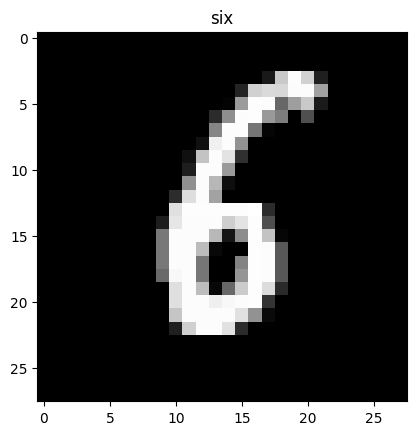

In [28]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_[test_labels[0]])

In [29]:
#Make prediction:
pred_probs=make_prediction(model=model,
                       data=test_samples
                      )
pred_probs[:2]

tensor([[1.4139e-05, 7.3825e-09, 1.9438e-08, 5.9161e-11, 4.7981e-08, 2.0542e-04,
         9.9973e-01, 8.9402e-12, 5.3608e-05, 2.5995e-09],
        [7.1869e-06, 1.2533e-10, 1.7888e-09, 4.5261e-07, 3.8316e-08, 9.9686e-01,
         3.1230e-03, 2.7267e-11, 7.6934e-06, 1.1551e-06]])

In [31]:
test_labels

[6, 5, 4, 1, 1, 1, 4, 2, 4]

In [30]:
#convert prediction probabilities to label:
pred_lables=pred_probs.argmax(dim=1)
pred_lables

tensor([6, 5, 4, 1, 1, 1, 4, 2, 4])

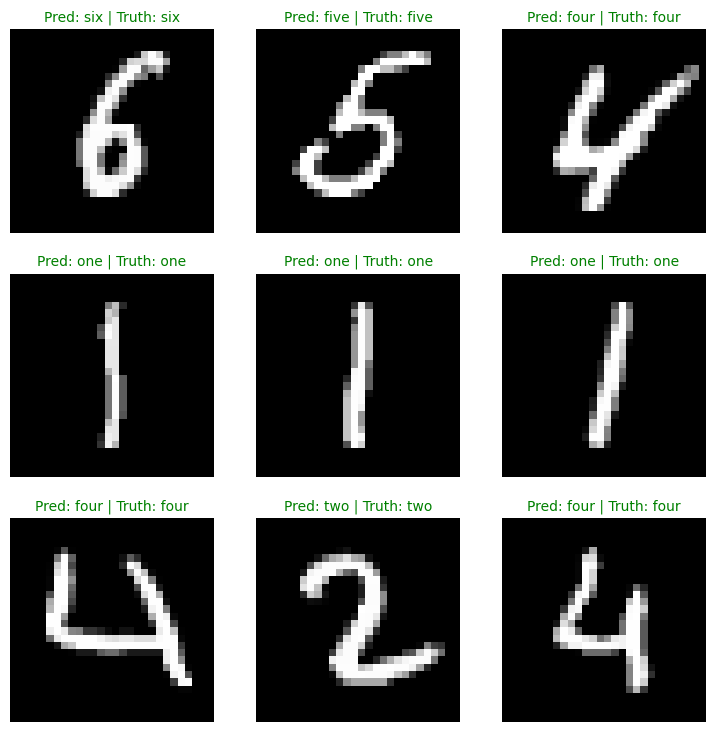

In [32]:
#visualize visualize visualize
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  #plot the subplot
  plt.subplot(nrows,ncols,i+1)
  #make the target image
  plt.imshow(sample.squeeze(),cmap="gray")
  #Predicted_labels:
  pred_label=class_[pred_lables[i]]
  #truth label:
  true_label=class_[test_labels[i]]

  #create the title of each subplot:
  title_text=f"Pred: {pred_label} | Truth: {true_label}"

  #check the eqality and changing color of right or wrong prdiction:
  if pred_label==true_label:
    plt.title(title_text,fontsize=10,c='g')
    plt.axis("off")
  else:
    plt.title(title_text,fontsize=10,c="r")
    plt.axis("off")

In [33]:
#creating the path and folder
Model_path=Path("Model_CNN")
Model_path.mkdir(parents=True,
                 exist_ok=True)

#Model naming and its path naming:
Model_name="Exercise_4_model_CNN.pth"
Model_saving_path=Model_path / Model_name

#saving the model:
print(f"Saving model to: {Model_saving_path}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=Model_saving_path)

Saving model to: Model_CNN/Exercise_4_model_CNN.pth


In [36]:
#now we will create evaluation function so that it can run for diffrent model:
def eval(model_=torch.nn.Module,
         data_loader=torch.utils.data.DataLoader,
         loss_fn=torch.nn.Module,
         accuracy_fn=None,
         device: torch.device = device):
  model_.eval()
  loss=0
  accu=0
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y=X.to(device),y.to(device)
      y_pred=model_(X)
      loss+=loss_fn(y_pred,y).item()
      accu+=accuracy_fn(y_true=y,
                y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    accu/=len(data_loader)

  return {"Model_name":model_.__class__.__name__,
          "Model_loss":loss,
          "Model_accuracy":accu}

model_result=eval(model_=model,
     data_loader=test_dataloader,
     loss_fn=Loss_fn,
     accuracy_fn=accuracy_fn)

print(model_result)

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'Model_classifier_CNN', 'Model_loss': 0.04183773210593172, 'Model_accuracy': 98.66214057507987}


In [37]:
#using our saved model again:
loaded_model=Model_classifier_CNN(input_shape=1,
                      hidden_layer=30,
                      output_shape=1)
loaded_model.load_state_dict(torch.load(f=Model_saving_path))
loaded_model=loaded_model.to(device)
#evaluate our model:
torch.manual_seed(42)
loaded_model_result=eval(model_=loaded_model,
                         data_loader=test_dataloader,
                         loss_fn=Loss_fn,
                         accuracy_fn=accuracy_fn,
                         device=device)
loaded_model_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'Model_classifier_CNN',
 'Model_loss': 0.04183773210593172,
 'Model_accuracy': 98.66214057507987}